# **Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# **Data Loading and Convert into Required Format**






In [ ]:
import csv

# Open the .txt file for reading
with open('/content/wwtp_1year_time_lag_0.txt', 'r') as txtfile:
    # Read the contents of the .txt file
    lines = txtfile.readlines()

    # Open a .csv file for writing
    with open('file1.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # As the data is tab-separated, you can split each line by '\t'
        for line in lines:
            # Split each line into fields
            fields = line.strip().split('\t')  # As tab-separated

            # Write the fields into the .csv file
            writer.writerow(fields)


In [ ]:
import csv

# Open the .txt file for reading
with open('/content/wwtp_1year_time_lag_2.txt', 'r') as txtfile:
    # Read the contents of the .txt file
    lines = txtfile.readlines()

    # Open a .csv file for writing
    with open('file2.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Assuming data is tab-separated, you can split each line by '\t'
        for line in lines:
            # Split each line into fields
            fields = line.strip().split('\t')  # Assuming tab-separated

            # Write the fields into the .csv file
            writer.writerow(fields)

In [ ]:
import csv

# Open the .txt file for reading
with open('/content/wwtp_1year_time_lag_4.txt', 'r') as txtfile:
    # Read the contents of the .txt file
    lines = txtfile.readlines()

    # Open a .csv file for writing
    with open('file3.csv', 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Assuming data is tab-separated, you can split each line by '\t'
        for line in lines:
            # Split each line into fields
            fields = line.strip().split('\t')  # Assuming tab-separated

            # Write the fields into the .csv file
            writer.writerow(fields)

# **Data Preprocessing and EDA**

In [ ]:
# Define the column names as per the given data and column details in the paper
column_names = ['Chlorine in the raw water', 'Chlorine in the effluent',
                'Turbidity in the raw water', 'Turbidity in the coagulated water',
                'Turbidity in the effluent', 'pH in the raw water',
                'pH in the coagulated water', 'Ph in the effluent',
                'Color in the raw water', 'Color in the coagulated water',
                'Color in the effluent', 'Fluoride in the effluent']

# Load the CSV file with column names
df1= pd.read_csv('/content/file1.csv', names=column_names)
df2 = pd.read_csv('/content/file1.csv', names=column_names)
df3 = pd.read_csv('/content/file1.csv', names=column_names)

In [ ]:
#concating the 3 different files into a single file
df = pd.concat([df1, df2, df3], ignore_index=True)

In [ ]:
df.head() #first 5 Row

,Chlorine in the raw water,Chlorine in the effluent,Turbidity in the raw water,Turbidity in the coagulated water,Turbidity in the effluent,pH in the raw water,pH in the coagulated water,Ph in the effluent,Color in the raw water,Color in the coagulated water,Color in the effluent,Fluoride in the effluent
0,0.65,3.30,3.03,3.65,0.35,8.12,7.64,7.29,40.0,30.0,2.0,0.29
1,1.60,4.05,2.61,3.63,0.40,8.10,7.30,7.15,40.0,30.0,2.0,0.26
2,0.60,3.53,2.86,3.52,0.41,8.19,7.49,7.21,40.0,30.0,2.0,0.27
3,0.82,3.63,2.75,3.63,0.41,8.15,7.54,7.27,40.0,30.0,2.0,0.29
4,1.07,3.63,2.54,3.30,0.40,8.08,7.44,7.22,40.0,30.0,2.0,0.28


In [ ]:
df.shape

(1080, 12)

In [ ]:
print(df.isnull().sum()) #checking if any value is null in the dataset

Chlorine in the raw water            0
Chlorine in the effluent             0
Turbidity in the raw water           0
Turbidity in the coagulated water    0
Turbidity in the effluent            0
pH in the raw water                  0
pH in the coagulated water           0
Ph in the effluent                   0
Color in the raw water               0
Color in the coagulated water        0
Color in the effluent                0
Fluoride in the effluent             0
dtype: int64


In [ ]:
df.describe()

,Chlorine in the raw water,Chlorine in the effluent,Turbidity in the raw water,Turbidity in the coagulated water,Turbidity in the effluent,pH in the raw water,pH in the coagulated water,Ph in the effluent,Color in the raw water,Color in the coagulated water,Color in the effluent,Fluoride in the effluent
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,1.242056,3.834778,4.606722,6.069722,0.546694,7.794972,7.156972,6.927389,51.166667,38.666667,2.550000,0.191861
std,0.946905,0.494224,1.945693,2.025867,0.269296,0.240622,0.223077,0.194688,8.777446,6.318691,1.161356,0.042474
min,0.020000,2.460000,2.160000,2.640000,0.290000,7.130000,6.480000,6.400000,40.000000,30.000000,2.000000,0.110000
25%,0.640000,3.520000,2.920000,4.332500,0.390000,7.660000,7.020000,6.820000,50.000000,30.000000,2.000000,0.160000
50%,0.975000,3.850000,4.015000,6.205000,0.450000,7.830000,7.160000,6.940000,50.000000,40.000000,2.000000,0.180000
75%,1.485000,4.142500,5.847500,7.550000,0.600000,7.980000,7.300000,7.060000,60.000000,40.000000,2.000000,0.220000
max,4.990000,5.530000,10.500000,11.300000,2.580000,8.190000,7.970000,7.370000,80.000000,60.000000,5.000000,0.390000


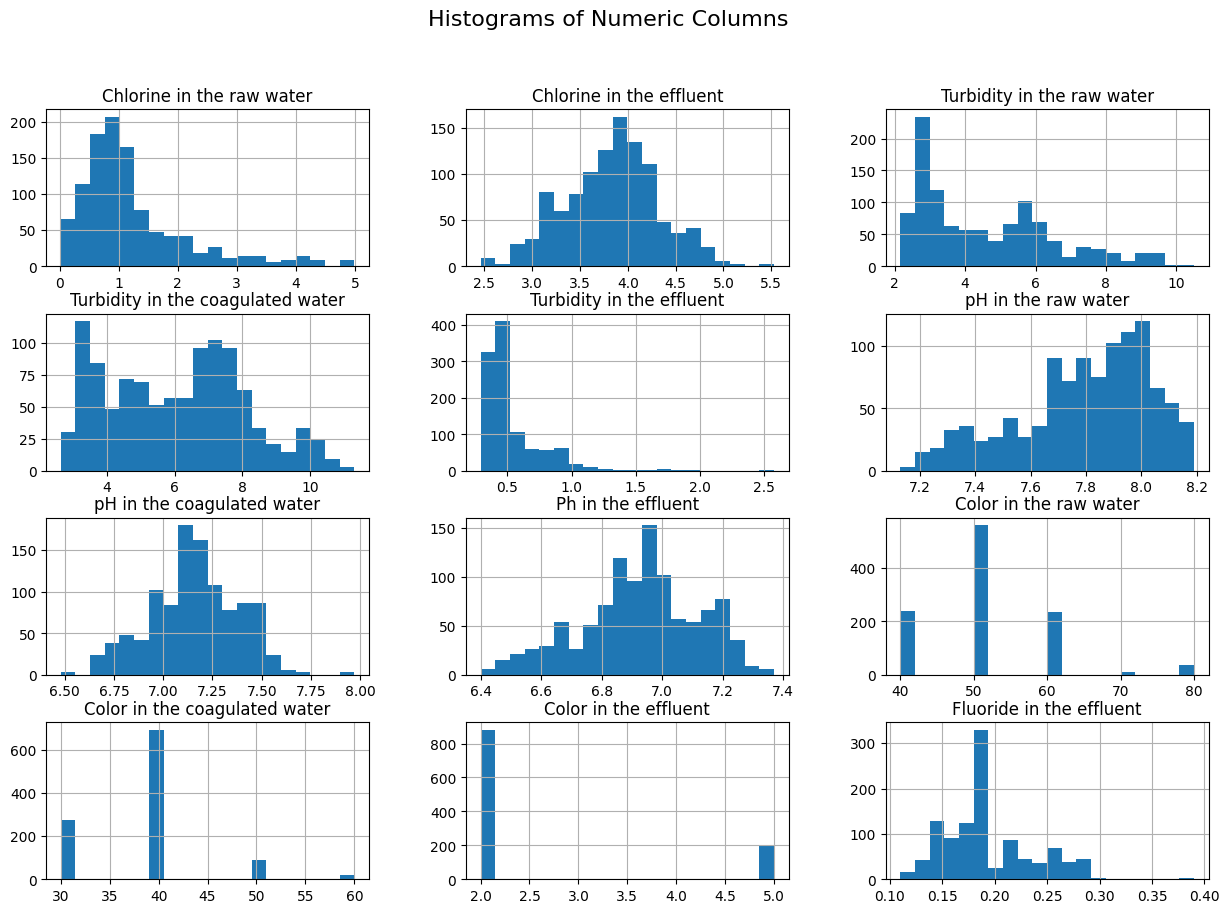

In [ ]:
# Plot histograms for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns', fontsize=16)
plt.show()

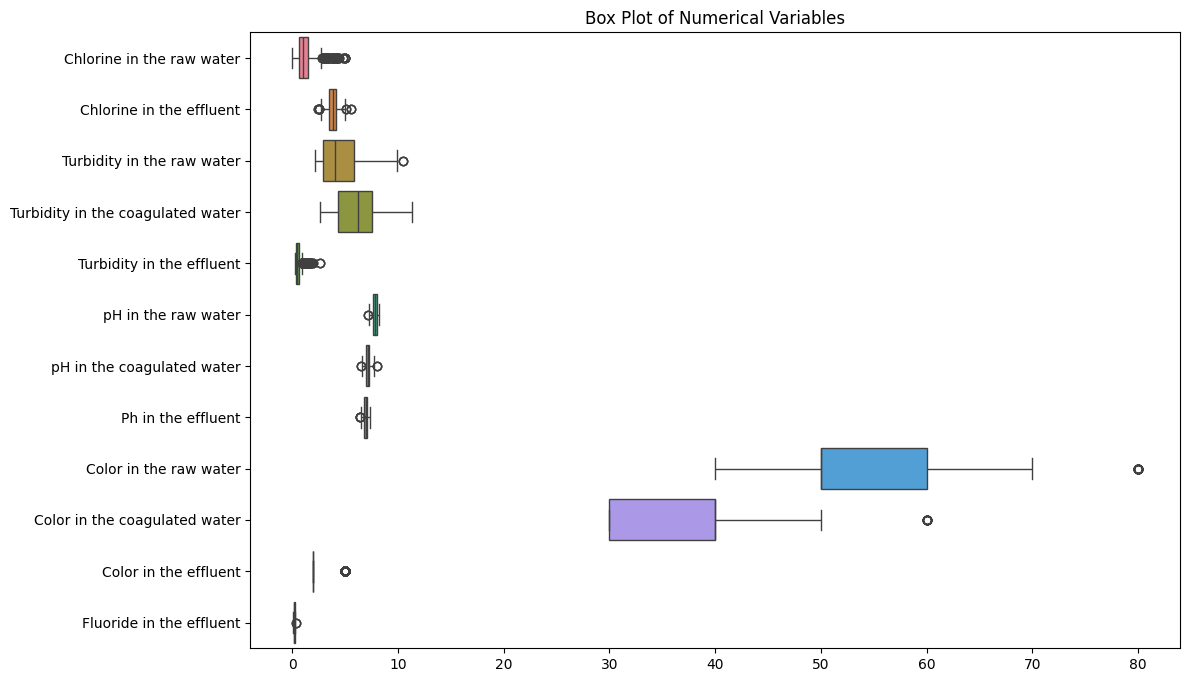

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Numerical Variables')
plt.show()

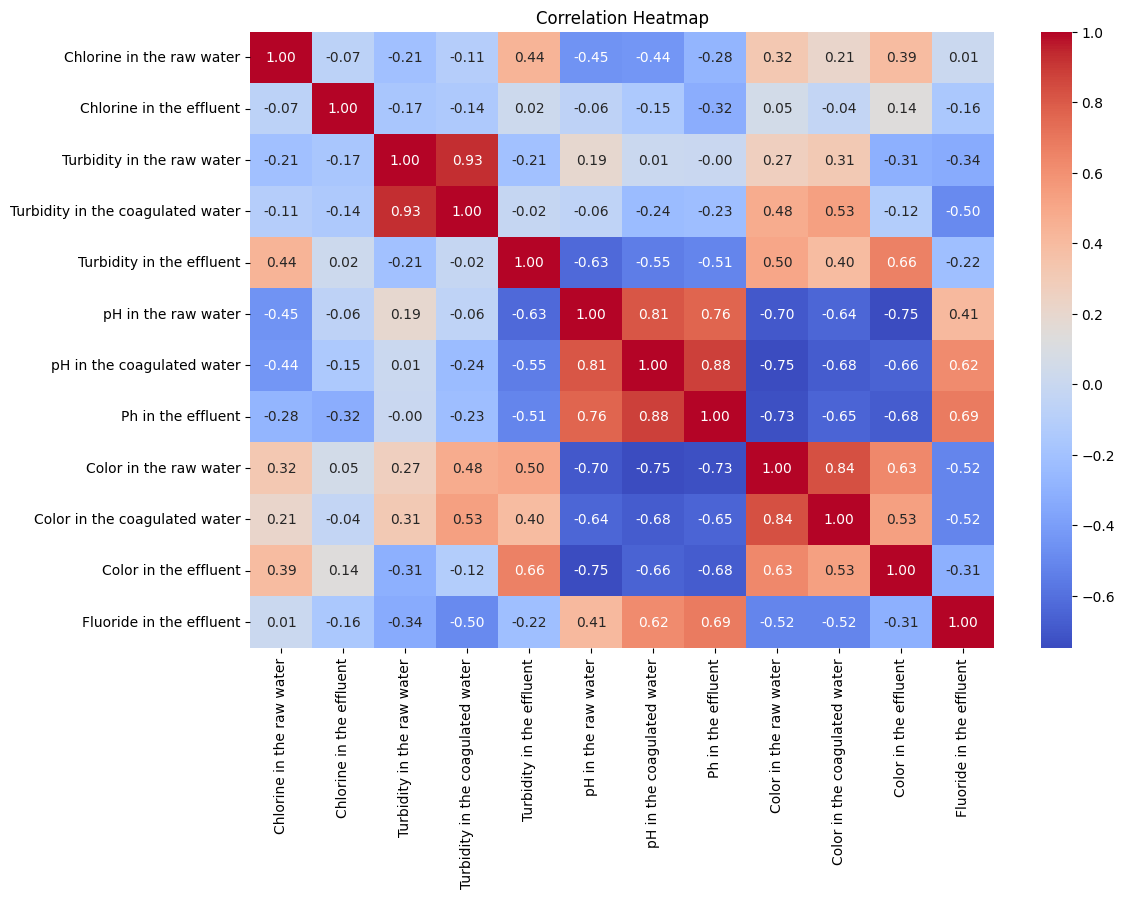

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# **Data Splitting and Normalization**

In [ ]:
X = df.drop(columns=['Fluoride in the effluent'])
y = df['Fluoride in the effluent']

scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Calculate performance metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

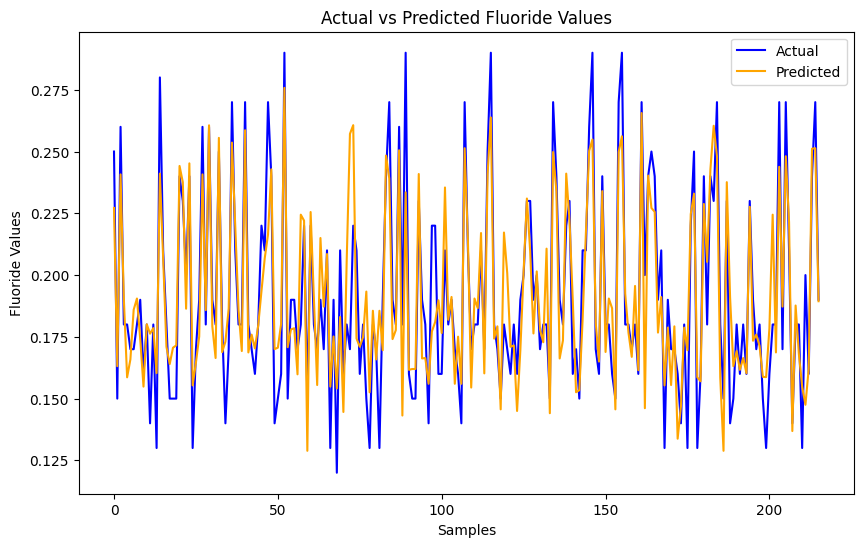

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_lr, label='Predicted', color='orange')
plt.xlabel('Samples')
plt.ylabel('Fluoride Values')
plt.title('Actual vs Predicted Fluoride Values')
plt.legend()
plt.show()

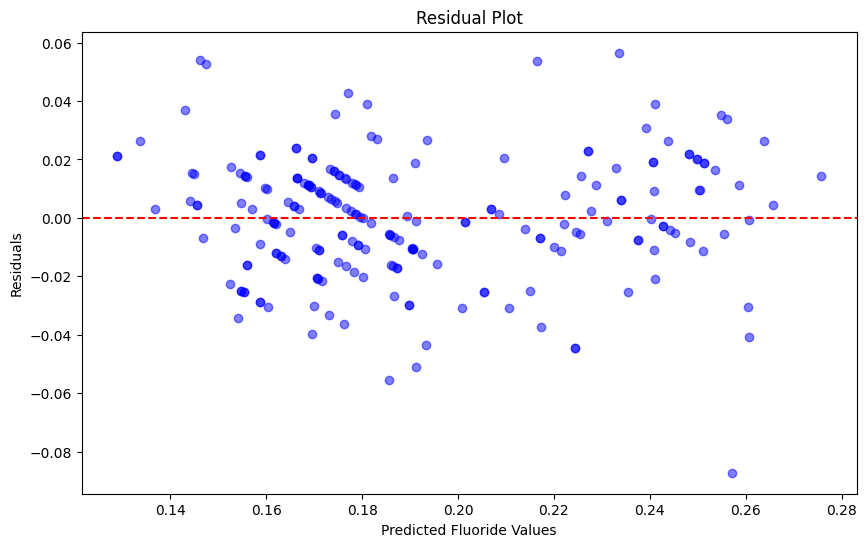

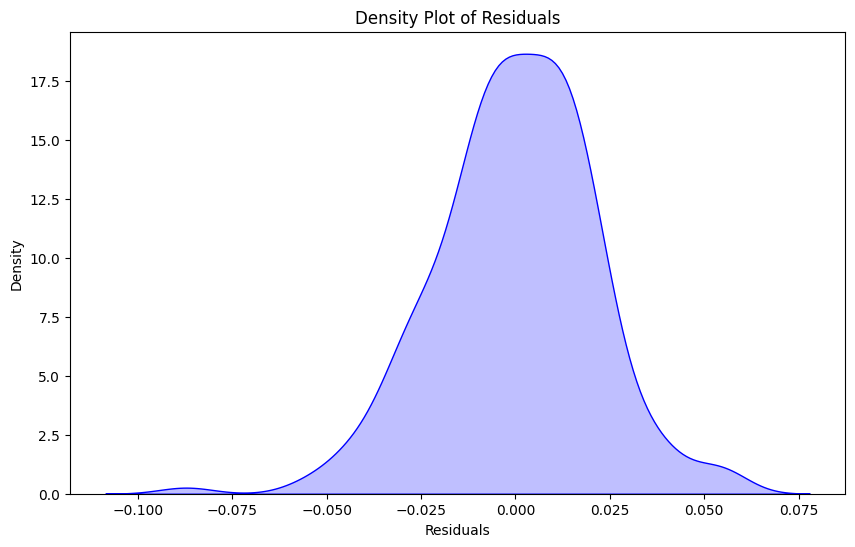

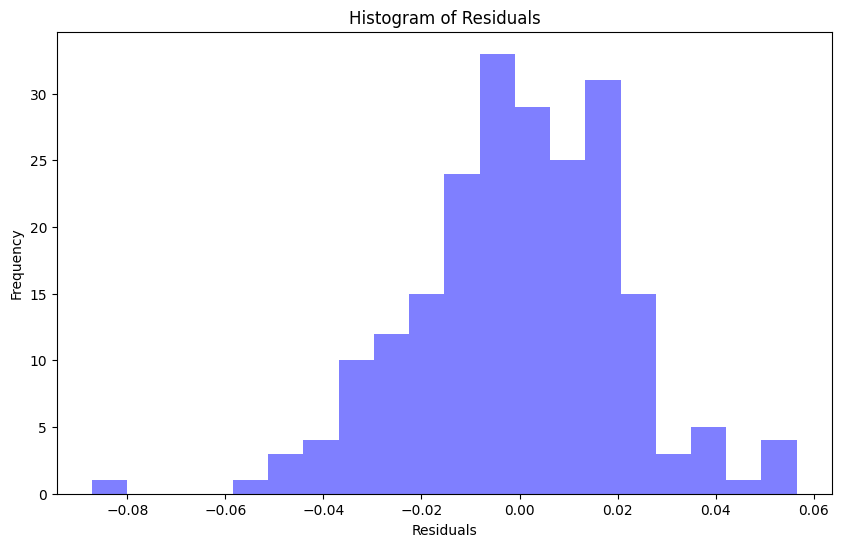

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fluoride Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

# Error Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# **Random Forest Regressor**

In [ ]:
# Initialize and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate performance metrics for Random Forest Regression
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

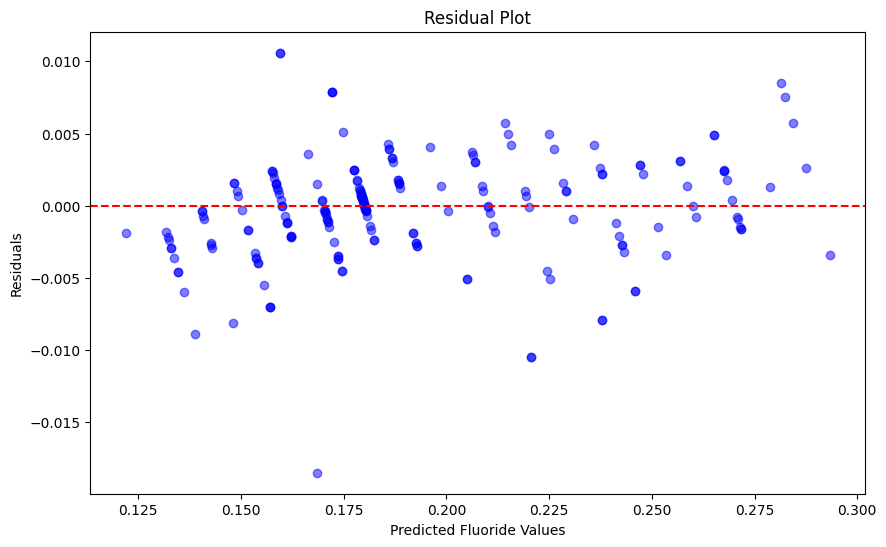

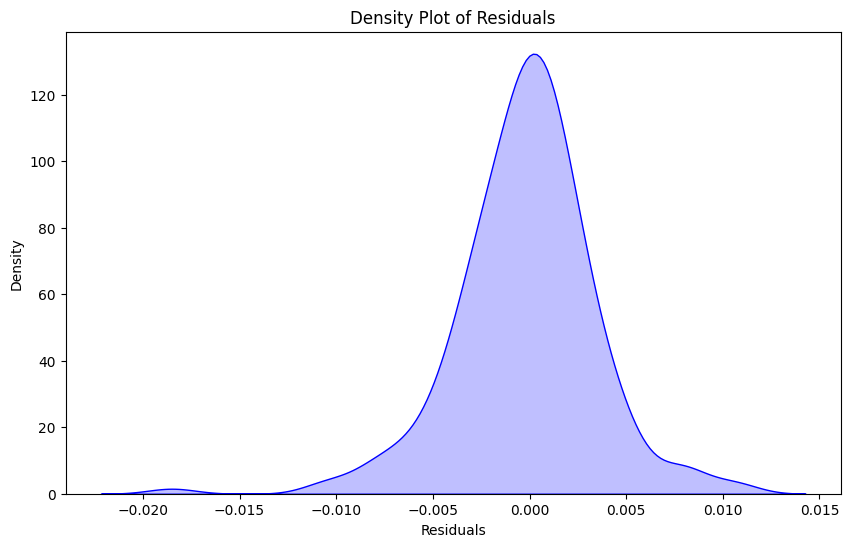

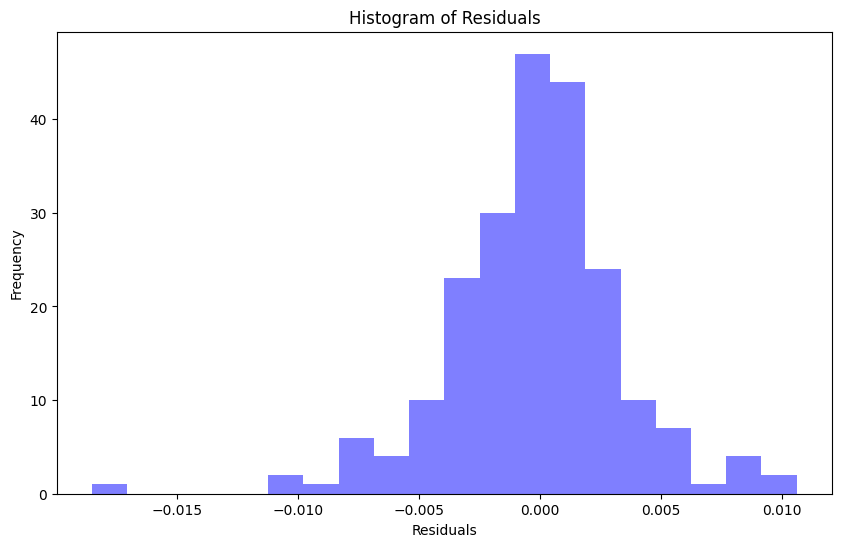

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_rf

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fluoride Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

# Error Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# **Decision Tree Regression model**

In [ ]:
# Initialize and train the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42,max_depth=3)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)


In [ ]:
# Calculate performance metrics for Decision Tree Regression
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("DTRM:")
print("Mean Squared Error:", mse_dt)
print("Root Mean Squared Error:", rmse_dt)
print("Mean Absolute Error:", mae_dt)
print("R-squared (R2) Score:", r2_dt)
print()

DTRM:
Mean Squared Error: 0.00038565069478038353
Root Mean Squared Error: 0.01963799110857278
Mean Absolute Error: 0.014800810039466991
R-squared (R2) Score: 0.7625383708779432



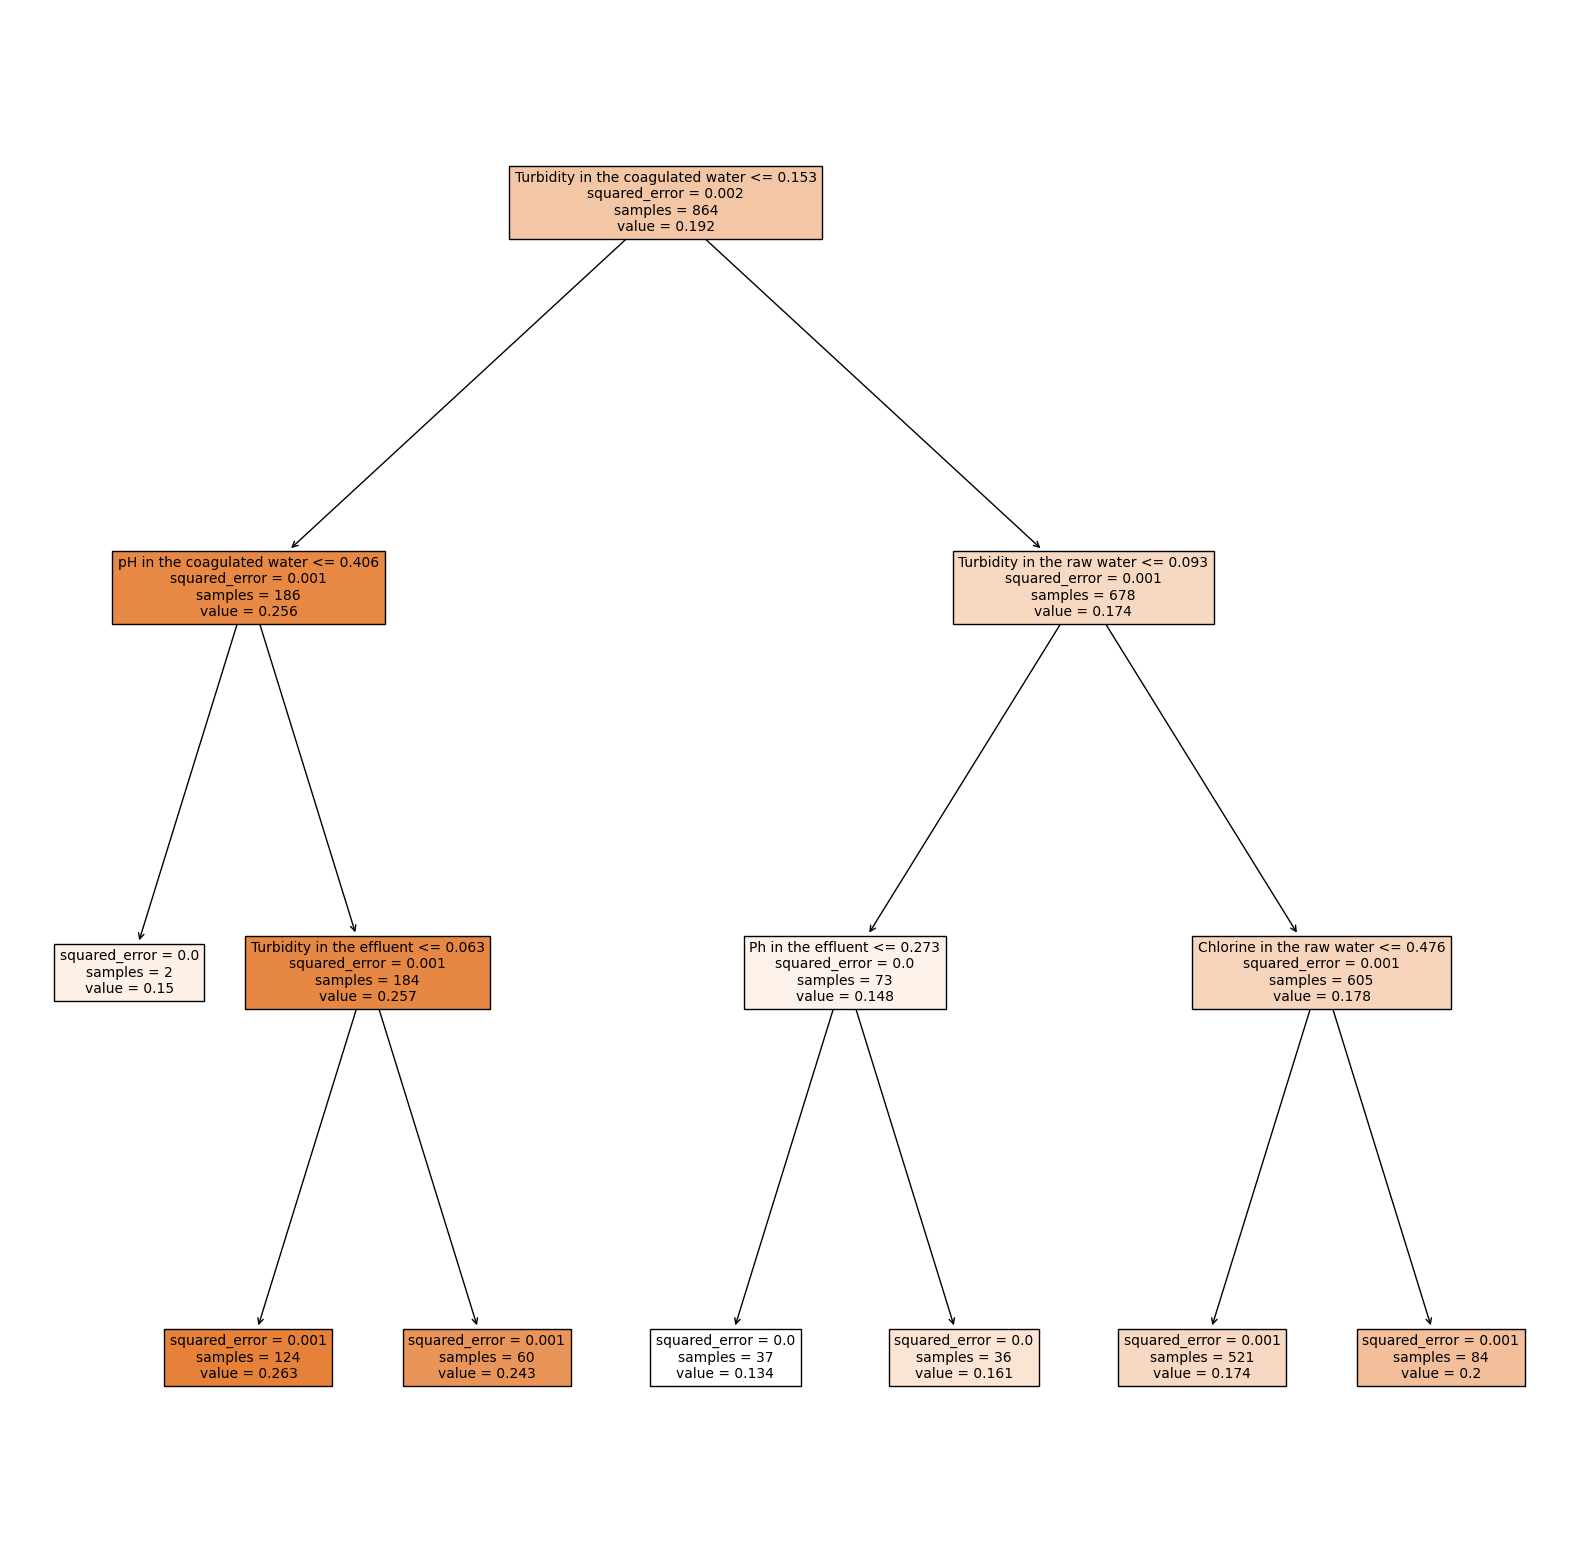

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dt_model, feature_names=X.columns, filled=True, fontsize=10)
plt.show()

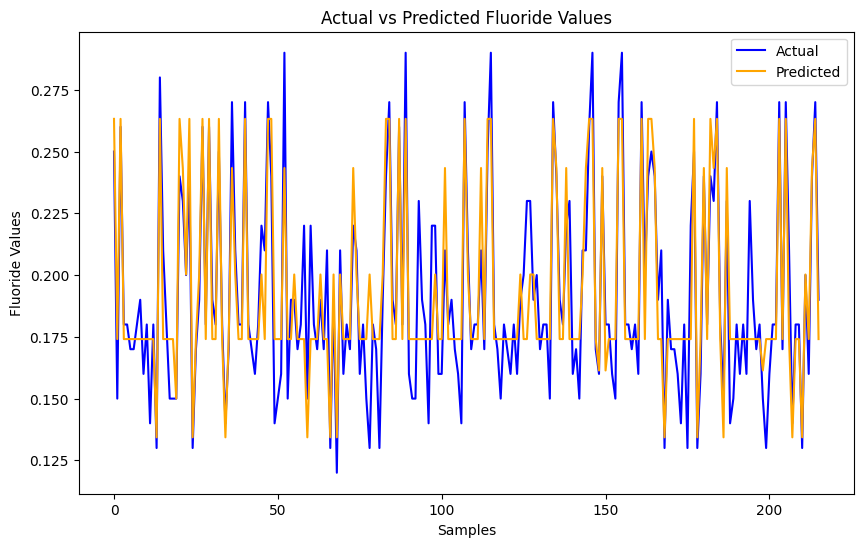

In [ ]:
# Plotting predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred_dt, label='Predicted', color='orange')
plt.xlabel('Samples')
plt.ylabel('Fluoride Values')
plt.title('Actual vs Predicted Fluoride Values')
plt.legend()
plt.show()


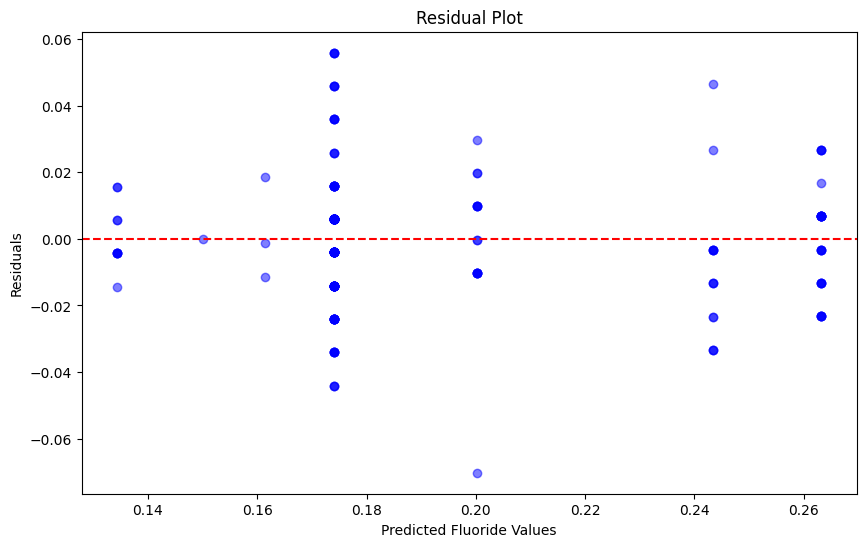

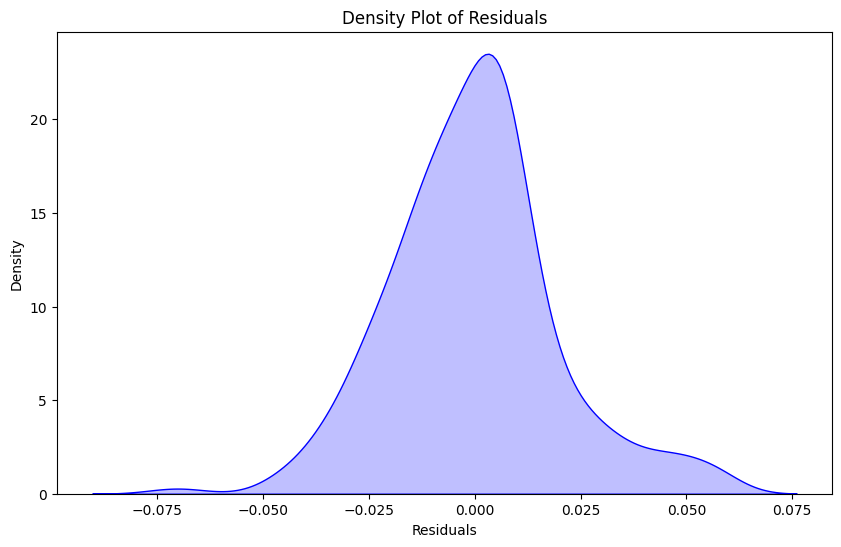

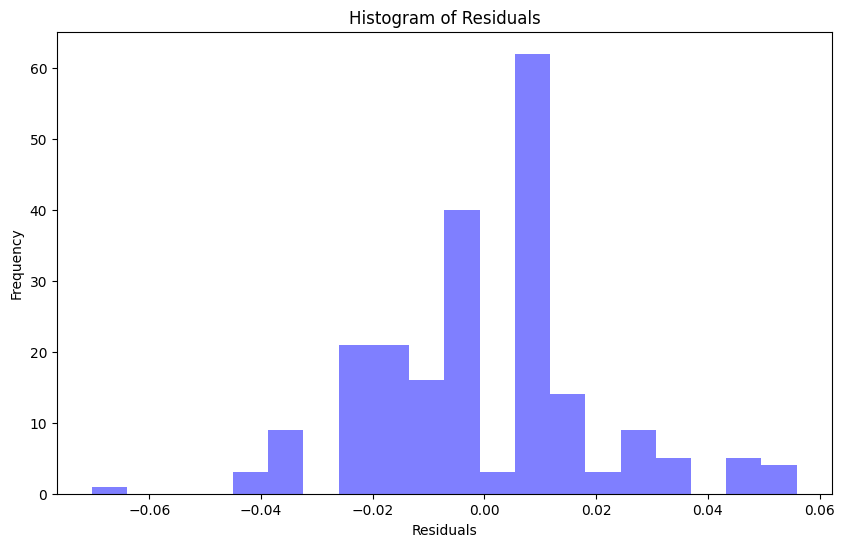

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_dt

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fluoride Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(residuals, color='blue', fill=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Density Plot of Residuals')
plt.show()

# Error Histogram
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# **NEURAL NETWORK**

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [ ]:
y_pred_nn = model.predict(X_test)
# Calculate MSE, RMSE, MAE, and R2 score for Neural Network
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mean_squared_error(y_test, y_pred_nn, squared=False)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network:")
print("Mean Squared Error:", mse_nn)
print("Root Mean Squared Error:", rmse_nn)
print("Mean Absolute Error:", mae_nn)
print("R-squared (R2) Score:", r2_nn)
print()

7/7 [==============================] - 0s 3ms/step
Neural Network:
Mean Squared Error: 0.00012542127181593181
Root Mean Squared Error: 0.01119916388914511
Mean Absolute Error: 0.007863612023216707
R-squared (R2) Score: 0.9227727580033744



In [ ]:
# Calculate the average prediction from all the above models
average_prediction = (y_pred_dt + y_pred_rf + y_pred_lr + y_pred_nn) / 4

# Since average_prediction has a shape of (72, 72), we need to take the mean along axis 1 to get a single prediction for each sample
average_prediction_single = average_prediction.mean(axis=1)

# Calculate performance metrics for the average model
mse_avg = mean_squared_error(y_test, average_prediction_single)
rmse_avg = mean_squared_error(y_test, average_prediction_single, squared=False)
mae_avg = mean_absolute_error(y_test, average_prediction_single)
r2_avg = r2_score(y_test, average_prediction_single)

# Print metrics for all models including the average model
print("Performance Metrics Comparison:")
print("================================")
print("Model                   MSE        RMSE       MAE        R2")
print("---------------------------------------------------------")
print("Decision Tree           {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(mse_dt, rmse_dt, mae_dt, r2_dt))
print("Random Forest           {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(mse_rf, rmse_rf, mae_rf, r2_rf))
print("Linear Regression       {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(mse_lr, rmse_lr, mae_lr, r2_lr))
print("Neural Network          {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(mse_nn, rmse_nn, mae_nn, r2_nn))
print("Average Model           {:.4f}     {:.4f}     {:.4f}     {:.4f}".format(mse_avg, rmse_avg, mae_avg, r2_avg))
print("---------------------------------------------------------")



Performance Metrics Comparison:
Model                   MSE        RMSE       MAE        R2
---------------------------------------------------------
Decision Tree           0.0004     0.0196     0.0148     0.7625
Random Forest           0.0000     0.0036     0.0026     0.9921
Linear Regression       0.0004     0.0209     0.0162     0.7320
Neural Network          0.0001     0.0112     0.0079     0.9228
Average Model           0.0009     0.0299     0.0237     0.4498
---------------------------------------------------------


In [ ]:
# def predict_fluoride():
#     u1 = float(input("Enter Chlorine in the raw water: "))
#     u2 = float(input("Enter Chlorine in the effluent: "))
#     u3 = float(input("Enter Turbidity in the raw water: "))
#     u4 = float(input("Enter Turbidity in the coagulated water: "))
#     u5 = float(input("Enter Turbidity in the effluent: "))
#     u6 = float(input("Enter pH in the raw water: "))
#     u7 = float(input("Enter pH in the coagulated water: "))
#     u8 = float(input("Enter Ph in the effluent: "))
#     u9 = float(input("Enter Color in the raw water: "))
#     u10 = float(input("Enter Color in the coagulated water: "))
#     u11 = float(input("Enter Color in the effluent: "))

#     # Normalize user input
#     user_input = scaler.transform([[u1, u2, u3, u4, u5, u6, u7, u8, u9, u10, u11]])

#     # Predict fluoride value
#     predicted_fluoride = model.predict(user_input)

#     print("Predicted Fluoride in the effluent:", predicted_fluoride[0])

# # Run the function to predict fluoride value based on user input
# predict_fluoride()

# RNN

Epoch 1/10
22/22 [==============================] - 4s 39ms/step - loss: 0.0043 - val_loss: 7.2245e-04
Epoch 2/10
22/22 [==============================] - 0s 13ms/step - loss: 7.1009e-04 - val_loss: 5.7233e-04
Epoch 3/10
22/22 [==============================] - 0s 14ms/step - loss: 5.7300e-04 - val_loss: 5.0580e-04
Epoch 4/10
22/22 [==============================] - 0s 13ms/step - loss: 5.2011e-04 - val_loss: 4.9117e-04
Epoch 5/10
22/22 [==============================] - 0s 14ms/step - loss: 4.9918e-04 - val_loss: 5.5528e-04
Epoch 6/10
22/22 [==============================] - 0s 16ms/step - loss: 5.2972e-04 - val_loss: 5.4341e-04
Epoch 7/10
22/22 [==============================] - 1s 34ms/step - loss: 5.3194e-04 - val_loss: 4.9953e-04
Epoch 8/10
22/22 [==============================] - 0s 16ms/step - loss: 5.5485e-04 - val_loss: 9.2011e-04
Epoch 9/10
22/22 [==============================] - 1s 28ms/step - loss: 5.3610e-04 - val_loss: 4.8123e-04
Epoch 10/10
7/7 [========================

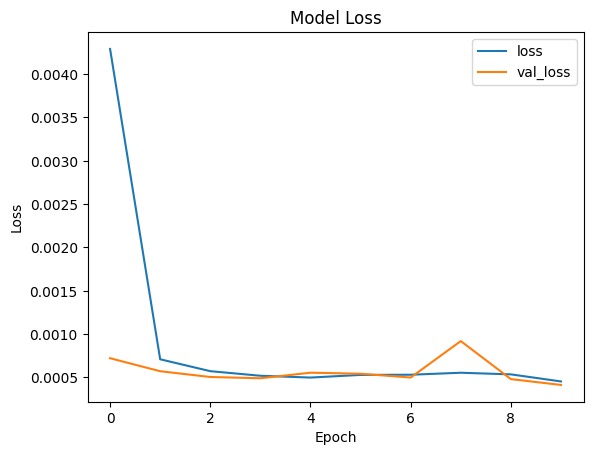

In [ ]:
model = Sequential([
    SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    SimpleRNN(units=64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Visualize Training History
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# LSTM

Epoch 1/10
22/22 [==============================] - 7s 54ms/step - loss: 0.0084 - val_loss: 0.0028
Epoch 2/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 3/10
22/22 [==============================] - 1s 23ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 4/10
22/22 [==============================] - 1s 24ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 5/10
22/22 [==============================] - 1s 24ms/step - loss: 9.7053e-04 - val_loss: 8.4987e-04
Epoch 6/10
22/22 [==============================] - 1s 23ms/step - loss: 7.8345e-04 - val_loss: 7.0118e-04
Epoch 7/10
22/22 [==============================] - 1s 24ms/step - loss: 7.1674e-04 - val_loss: 6.5222e-04
Epoch 8/10
22/22 [==============================] - 1s 24ms/step - loss: 6.5307e-04 - val_loss: 5.6161e-04
Epoch 9/10
22/22 [==============================] - 1s 25ms/step - loss: 6.2875e-04 - val_loss: 5.7913e-04
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss

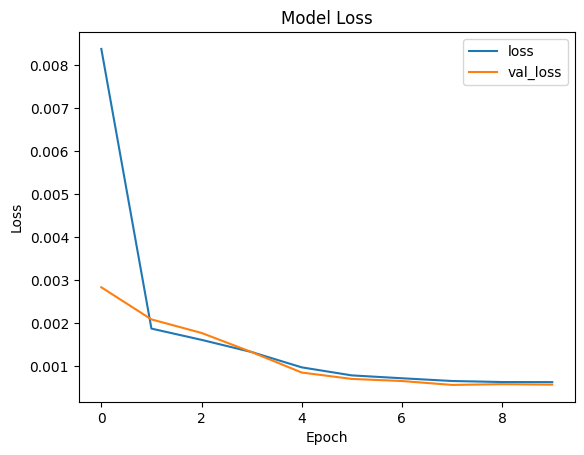

In [ ]:
model = Sequential([
    LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=64, activation='relu', return_sequences=True),
    SimpleRNN(units=32, activation='relu', return_sequences=True),
    SimpleRNN(units=32, activation='relu'),
    Dense(1)
])

# Compiling the Model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error for regression

# Training the Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluating the Model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')

# Visualize Training History
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

7/7 [==============================] - 1s 10ms/step


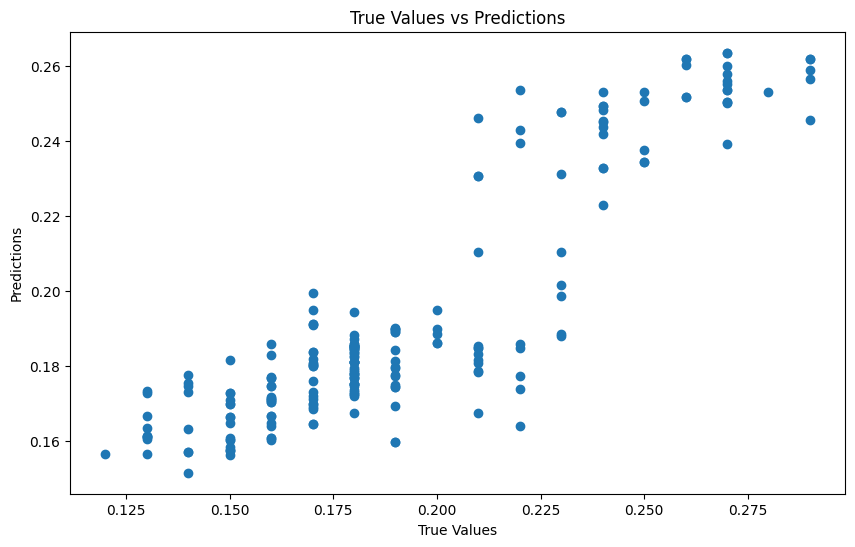

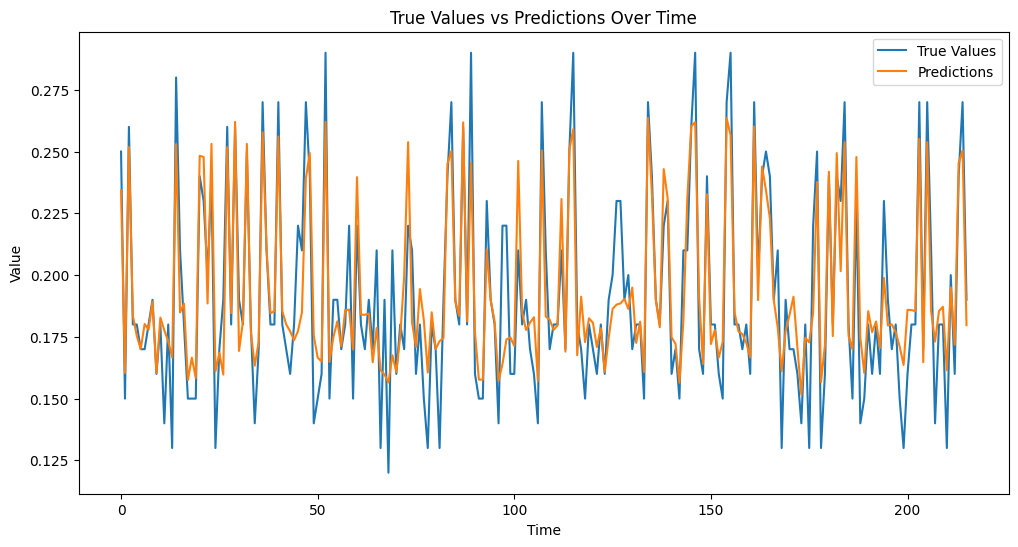

In [ ]:
# Making Predictions
predictions = model.predict(X_test)

# Visualize Predictions vs True Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

# Visualize Predictions Over Time
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='True Values')
plt.plot(predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('True Values vs Predictions Over Time')
plt.legend()
plt.show()